## Auto-Encoder and Clustering



Machine Learning -  Homework #5 - University of Memphis. Fall 2022  <br>
Last updated - Dec 1, 2022  <br>
Author Bereket Kebede, Graduate Student <br>


## Getting Started 
----

In [2]:
########################################################
# import necesarry libriaries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np
from tensorflow.keras import backend as K
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## Data preparation


1. Read the samples from MNIST_train.csv
2. Normalize the input samples before applying the dimensionality reduction and clustering approaches.

We will do data normalization, which is an essential part for balancing out the weights for our model. Data normalization helps the model converge to the minimum quicker for gradient descent.

In [3]:
########################################################
# import dataset

data=pd.read_csv("MNIST_train.csv") #load the data into a pandas dataframe
data.head(5) #Show the first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = data.iloc[:,1:]
x_train = x_train/255.0 # normalization
print(x_train.shape)

(42000, 784)


## Feature Embedding using AutoEncoder


An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. The encoder can then be used as a data preparation technique to perform feature extraction on raw data that can be used to train a different machine learning model.

In [7]:
## define the encoder
inputs_dim = x_train.shape[1]
encoder = Input(shape = (inputs_dim, ))
e = Dense(500, activation = "relu")(encoder)
e = Dense(200, activation = "relu")(e)
e = Dense(100, activation = "relu")(e)


## bottleneck layer
n_bottleneck = 50
## defining it with a name to extract it later
bottleneck_layer = 'bottleneck_layer'
# can also be defined with an activation function, relu for instance
bottleneck = Dense(n_bottleneck, name = bottleneck_layer)(e)

## define the decoder (in reverse)
decoder = Dense(100, activation = "relu")(bottleneck)
decoder = Dense(200, activation = "relu")(decoder)
decoder = Dense(500, activation = "relu")(decoder)


## output layer
output = Dense(inputs_dim)(decoder)
## model
model_full = Model(inputs = encoder, outputs = output)
model_full.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 bottleneck_layer (Dense)    (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 200)               20200 

In [8]:
bottleneck_output = model_full.get_layer('bottleneck_layer').output
model_bottleneck = Model(inputs = encoder, outputs = bottleneck_output)

In [10]:
## representing the data in lower dimension (embedding)

autoencoder_reduced = model_bottleneck.predict(x_train)
autoencoder_reduced.shape

1313/1313 [==============================] - 5s 3ms/step


(42000, 50)

## Clustering using K-means

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.The objective of K-means is to group similar data points together and discover underlying patterns.

In [11]:
kmeans_model = KMeans(n_clusters = 10)
label = kmeans_model.fit_predict(autoencoder_reduced)

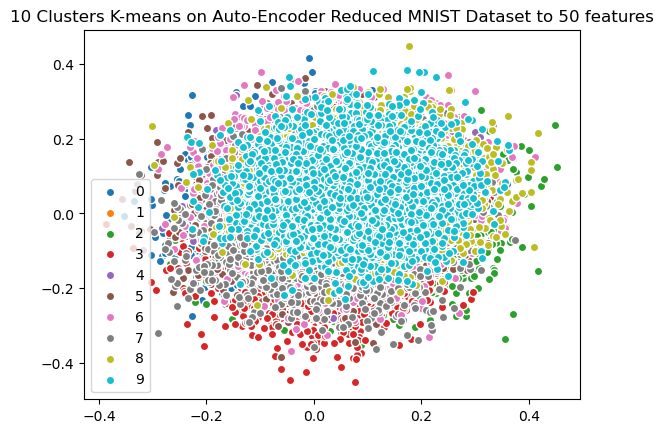

In [15]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(autoencoder_reduced[label == i , 0] , autoencoder_reduced[label == i , 1] , label = i, edgecolors='white')
plt.title('10 Clusters K-means on Auto-Encoder Reduced MNIST Dataset to 50 features')
plt.legend()
plt.show()

## Clustering using tSNE 

In [16]:
tnse_model = TSNE(n_components = 2)
y_tnse = tnse_model.fit_transform(autoencoder_reduced)

C:\Users\Berek\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Berek\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [42]:
y = data.loc[:,'label'].values

Text(0.5, 1.0, 'tSNE on Auto-Encoder compressed MNIST Dataset to 50 features')

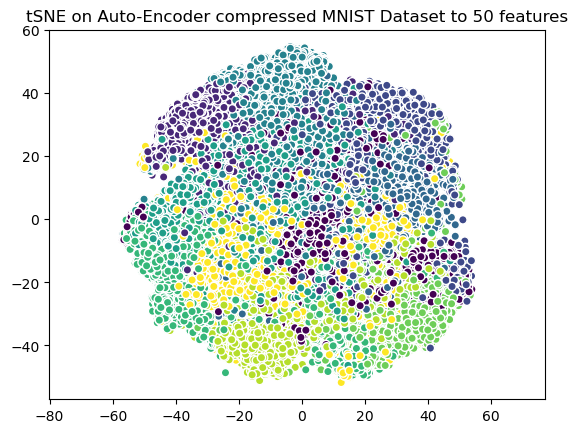

In [17]:
plt.scatter(y_tnse[:, 0], y_tnse[:, 1], c=label, edgecolors='white')
plt.gca().set_aspect('equal', 'datalim')
plt.title('tSNE on Auto-Encoder compressed MNIST Dataset to 50 features')

## References


[1] https://minimatech.org/autoencoder-with-manifold-learning-for-clustering-in-python/   <br>
[2] https://stackoverflow.com/questions/57875581/how-to-get-output-from-a-specific-layer-in-keras-tf-the-bottleneck-layer-in-aut <br>
[3] https://machinelearningmastery.com/autoencoder-for-classification/  <br>